# IMPORT

## IMPORT LIBRARY

In [1]:
# DataFrame
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
from nltk.stem.porter import PorterStemmer

#algoritma

from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB, GaussianNB, CategoricalNB #algoritma yang digunakan
from sklearn import model_selection, svm

#plot
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score

# Word2vec
import gensim
from wordcloud import WordCloud

# Utility
import string
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools
import csv

#ras

import pandas as pd
import seaborn as sns
import re, nltk
nltk.download('punkt')
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from wordcloud import WordCloud

#kaggle

from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## IMPORT DATASET

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
dataset_columns = ["label", "ids", "date", "flag", "user", "tweet"]

In [4]:
#lokasi baca file
data = pd.read_csv('gdrive/My Drive/dataset1/dataset_sentiment.csv', encoding='latin-1', names=dataset_columns)
data_awal = pd.read_csv('gdrive/My Drive/dataset1/dataset_sentiment.csv', encoding='latin-1', names=dataset_columns)

In [5]:
data.head()

,label,ids,date,flag,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
data

,label,ids,date,flag,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [7]:
data = data.iloc[400000:1200000, :]

In [8]:
data

,label,ids,date,flag,user,tweet
400000,0,2057298217,Sat Jun 06 12:44:31 PDT 2009,NO_QUERY,kannibalKoi,so mutha effin bored
400001,0,2057298537,Sat Jun 06 12:44:33 PDT 2009,NO_QUERY,TMankin,@CallaLilies83 not at all...I've spent most of...
400002,0,2057298663,Sat Jun 06 12:44:34 PDT 2009,NO_QUERY,theresa_jx,@GiGisOssum :/ My entire friggin family? Ther...
400003,0,2057298745,Sat Jun 06 12:44:34 PDT 2009,NO_QUERY,mishellfish,I absolutely &lt;3 sleeping in on saturdays. I...
400004,0,2057298766,Sat Jun 06 12:44:34 PDT 2009,NO_QUERY,meganleahhall,is a little upset at the moment
...,...,...,...,...,...,...
1199995,4,1985419277,Sun May 31 17:04:02 PDT 2009,NO_QUERY,yogunz,@misstinayao...im doin the same...so well defi...
1199996,4,1985419313,Sun May 31 17:04:01 PDT 2009,NO_QUERY,ERLong8502,Finding life's simple delights in the midst of...
1199997,4,1985419387,Sun May 31 17:04:02 PDT 2009,NO_QUERY,morgannee143,@McLovin143 just tell me when your on your wa...
1199998,4,1985419393,Sun May 31 17:04:02 PDT 2009,NO_QUERY,stephster,goodbye downtown


# CODE

In [9]:
decode_map = {0: "negative", 4:"positive"}

def decode_sentiment(label):
    return decode_map[int(label)]

In [10]:
data['label'] = data['label'].apply(lambda x: decode_sentiment(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
data.head()

,label,ids,date,flag,user,tweet
400000,negative,2057298217,Sat Jun 06 12:44:31 PDT 2009,NO_QUERY,kannibalKoi,so mutha effin bored
400001,negative,2057298537,Sat Jun 06 12:44:33 PDT 2009,NO_QUERY,TMankin,@CallaLilies83 not at all...I've spent most of...
400002,negative,2057298663,Sat Jun 06 12:44:34 PDT 2009,NO_QUERY,theresa_jx,@GiGisOssum :/ My entire friggin family? Ther...
400003,negative,2057298745,Sat Jun 06 12:44:34 PDT 2009,NO_QUERY,mishellfish,I absolutely &lt;3 sleeping in on saturdays. I...
400004,negative,2057298766,Sat Jun 06 12:44:34 PDT 2009,NO_QUERY,meganleahhall,is a little upset at the moment


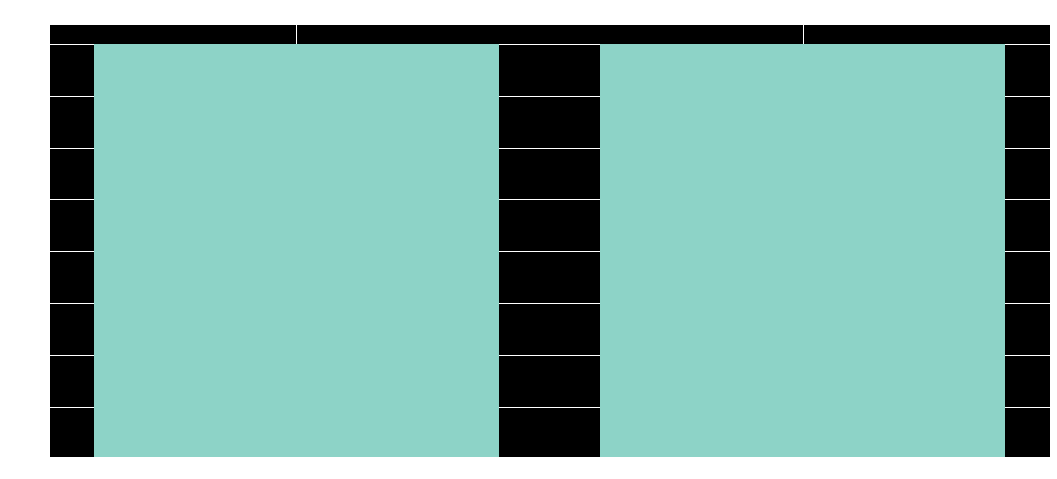

In [12]:
target = Counter(data['label'])

plt.figure(figsize=(16,8))
plt.bar(target.keys(), target.values())
plt.title("Distribusi Dataset labels")

plt.show()

In [13]:
data.isnull().sum()

label    0
ids      0
date     0
flag     0
user     0
tweet    0
dtype: int64

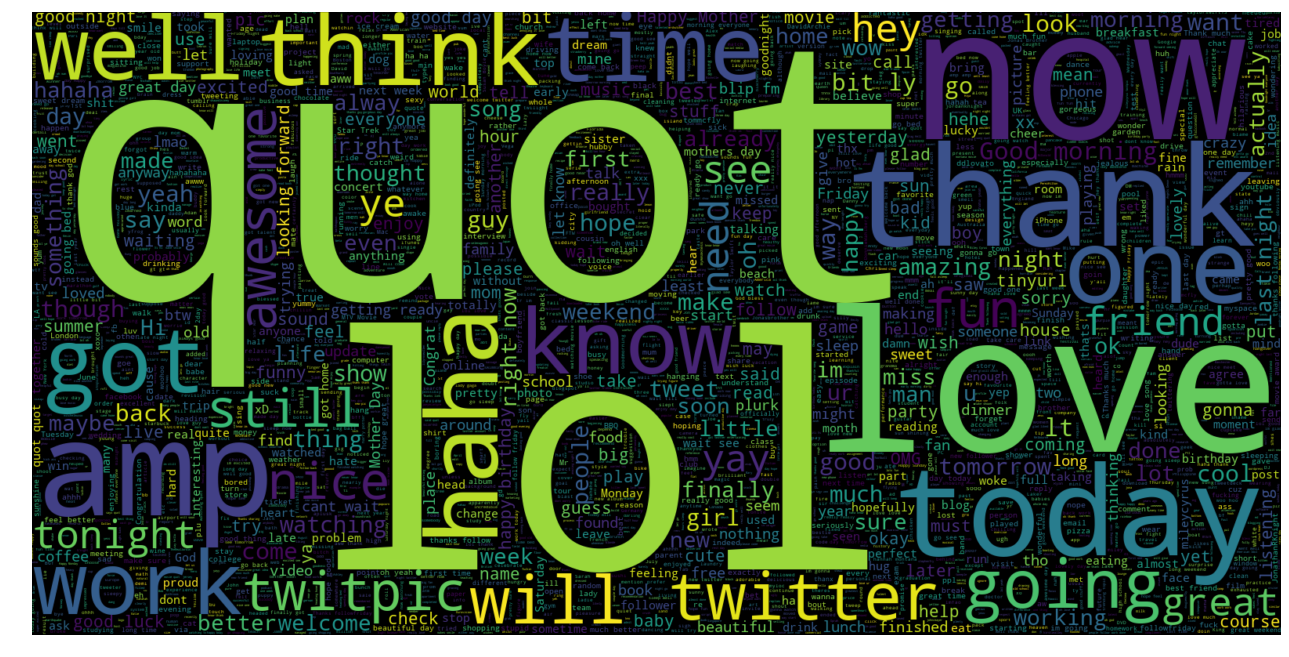

In [14]:
plt.figure(figsize = (20,20)) # Positive Sentiment
plt.grid(False)
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(data[data.label == 'positive'].tweet))
plt.imshow(wc , interpolation = 'bilinear')

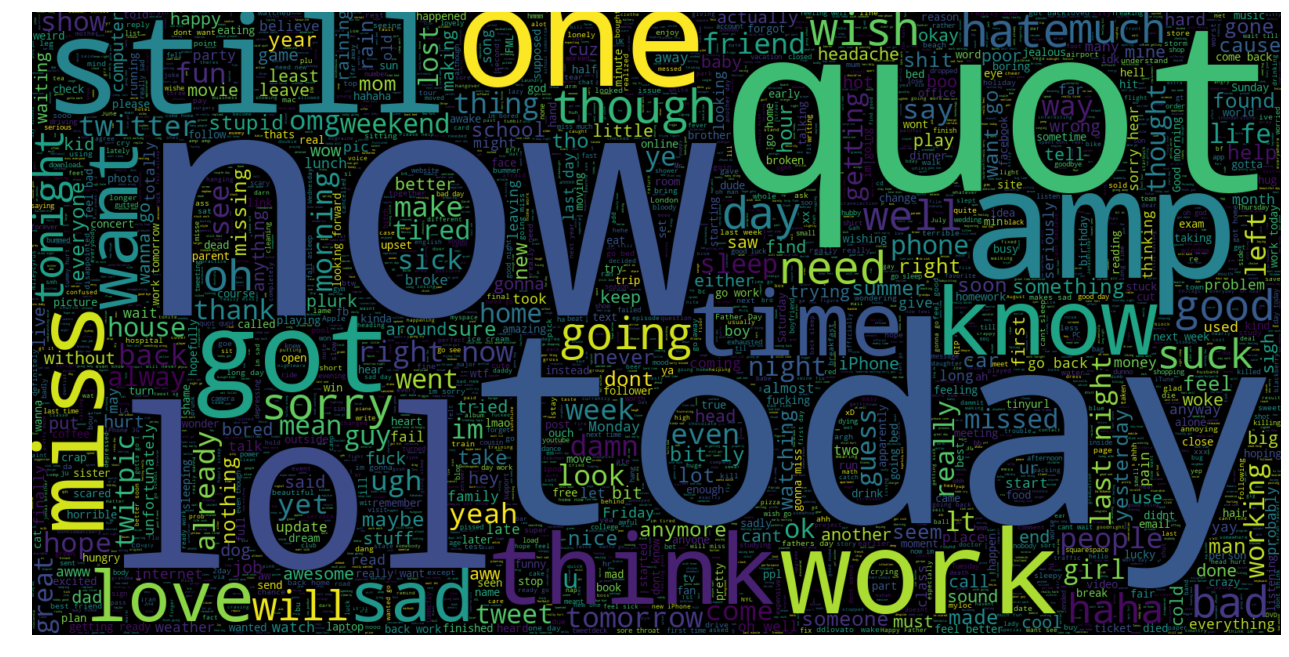

In [15]:
plt.figure(figsize = (20,20)) # Positive Sentiment
plt.grid(False)
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(data[data.label == 'negative'].tweet))
plt.imshow(wc , interpolation = 'bilinear')

## PROCESSING TEXT

In [16]:
def preprocess_tweet(text):

    """ RUBAH MENJADI HURUF KECIL """
    text = text.lower()
    
    """ MENGHILANGKAN UNICODE """
    
    text = text.encode("ascii", "ignore")
    text = text.decode()
    
    """ MENGHILANGKAN URL """
    
    text = re.sub('(www\.[^\s]+)|(https?://[^\s]+)',' ',text)
    
    """ MENGHILANGKAN HASHTAG """
    text = re.sub(r'#([^\s]+)', ' ', text)
    
    """ MENGHILANGKAN ANGKA """
    text = ''.join([i for i in text if not i.isdigit()])
    
    """ MENGHILANGKAN USERNAME """
    text = re.sub('@[^\s]+',' ',text)  
    
    
    """ MENGHILANGKAN TANDA BACA LAINNYA"""
    text = text.translate(str.maketrans("  ","  ",string.punctuation))

    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [17]:
def clean_the_tweet(text):
  tokens= nltk.word_tokenize(re.sub("[^a-zA-Z]", " ",text))
  tokens = [token.lower() for token in tokens]
  return ' '.join(tokens[2:])

In [18]:
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

def tokenize_word(text, stem=False):

    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
                
    tokens = [token.lower() for token in tokens]
    return " ".join(tokens[2:])

In [19]:
def text_process(msg):
  nopunc =[char for char in msg if char not in string.punctuation]
  nopunc=''.join(nopunc)
  return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])


In [20]:
data['cleaned_tweet'] = data['tweet'].apply(preprocess_tweet)

data.head()
data['label'] = data['label'].apply(lambda x: 1 if x =='positive' else 0)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,label,ids,date,flag,user,tweet,cleaned_tweet
400000,0,2057298217,Sat Jun 06 12:44:31 PDT 2009,NO_QUERY,kannibalKoi,so mutha effin bored,so mutha effin bored
400001,0,2057298537,Sat Jun 06 12:44:33 PDT 2009,NO_QUERY,TMankin,@CallaLilies83 not at all...I've spent most of...,not at allive spent most of the afternoon in t...
400002,0,2057298663,Sat Jun 06 12:44:34 PDT 2009,NO_QUERY,theresa_jx,@GiGisOssum :/ My entire friggin family? Ther...,my entire friggin family theres nothing to che...
400003,0,2057298745,Sat Jun 06 12:44:34 PDT 2009,NO_QUERY,mishellfish,I absolutely &lt;3 sleeping in on saturdays. I...,i absolutely lt sleeping in on saturdays i got...
400004,0,2057298766,Sat Jun 06 12:44:34 PDT 2009,NO_QUERY,meganleahhall,is a little upset at the moment,is a little upset at the moment


In [21]:
data['cleaned_tweet'] = data['cleaned_tweet'].apply(clean_the_tweet)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
data['cleaned_tweet'].head()

400000                                          effin bored
400001    allive spent most of the afternoon in the bath...
400002    friggin family theres nothing to check though ...
400003    lt sleeping in on saturdays i got ta find some...
400004                           little upset at the moment
Name: cleaned_tweet, dtype: object

In [23]:
data['cleaned_tweet'] = data['cleaned_tweet'].apply(text_process)
data.reset_index(drop=True, inplace = True)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,label,ids,date,flag,user,tweet,cleaned_tweet
0,0,2057298217,Sat Jun 06 12:44:31 PDT 2009,NO_QUERY,kannibalKoi,so mutha effin bored,effin bored
1,0,2057298537,Sat Jun 06 12:44:33 PDT 2009,NO_QUERY,TMankin,@CallaLilies83 not at all...I've spent most of...,allive spent afternoon bathroom
2,0,2057298663,Sat Jun 06 12:44:34 PDT 2009,NO_QUERY,theresa_jx,@GiGisOssum :/ My entire friggin family? Ther...,friggin family theres nothing check though gtl...
3,0,2057298745,Sat Jun 06 12:44:34 PDT 2009,NO_QUERY,mishellfish,I absolutely &lt;3 sleeping in on saturdays. I...,lt sleeping saturdays got ta find something ke...
4,0,2057298766,Sat Jun 06 12:44:34 PDT 2009,NO_QUERY,meganleahhall,is a little upset at the moment,little upset moment


In [24]:
data['label'].unique()

array([0, 1])

## Pembobotan Teks

In [25]:
vectorizer = TfidfVectorizer(use_idf=True, lowercase=True)
X_tf_idf= vectorizer.fit_transform(data.cleaned_tweet)


In [26]:
x_train, x_test, y_train, y_test = train_test_split(X_tf_idf, data['label'], random_state=42)

## ALGORITMA

In [27]:
def check_scores(clf, X_train, X_test, y_train, y_test):
  model = clf.fit(X_train, y_train)
  predicted_class = model.predict(X_test)
  predicted_class_train = model.predict(X_train)
  test_probs = model.predict_proba(X_test)
  test_probs = test_probs[:, 1:2]
  yhat = model.predict(X_test)
  lr_precision, lr_recall, _ = precision_recall_curve(y_test, test_probs)
  lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)


  print('Train confusion matrix is: ',)
  print(confusion_matrix(y_train, predicted_class_train))
  print()

  print('Test confusion matrix is: ')
  print(confusion_matrix(y_test, predicted_class))
  print()

  print(classification_report(y_test,predicted_class)) 
  print() 

  train_accuracy = accuracy_score(y_train,predicted_class_train)
  test_accuracy = accuracy_score(y_test,predicted_class)

  print("Train accuracy score: ", train_accuracy)
  print("Test accuracy score: ",test_accuracy )
  print()
  
  train_auc = roc_auc_score(y_train, clf.predict_proba(X_train))
  test_auc = roc_auc_score(y_test, clf.predict_proba(X_test))

  print("Train ROC-AUC score: ", train_auc)
  print("Test ROC-AUC score: ", test_auc)
  fig, (ax1, ax2) = plt.subplots(1, 2)

  
  return train_accuracy, test_accuracy, train_auc, test_auc


In [28]:
def grid_search(model, parameters, X_train, Y_train):
  #Doing a grid
  grid = GridSearchCV(estimator=model,
                       param_grid = parameters,
                       cv = 2, verbose=2, scoring='roc_auc')
  #Fitting the grid 
  grid.fit(X_train,Y_train)
  print()
  print()
  # Best model found using grid search
  optimal_model = grid.best_estimator_
  print('Best parameters are: ')
  print( grid.best_params_)

  return optimal_model

### Artificial Neural Network

In [29]:
corpus = [data['cleaned_tweet'][i] for i in range( len(data))]

voc_size=5000

onehot_=[one_hot(words,voc_size)for words in corpus] 

max_sent_length=max([len(i) for i in corpus])

embedded_docs=pad_sequences(onehot_,padding='pre',maxlen=max_sent_length)

model=Sequential()
model.add(Dense(512, input_dim = max_sent_length, activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

X_final=np.array(embedded_docs)
y_final=np.array(data['label'])
X_final.shape, y_final.shape

((800000, 140), (800000,))

In [30]:
X_train_NN, X_test_NN, y_train_NN, y_test_NN = train_test_split(X_final, y_final, test_size=0.3, random_state=42)
model.fit(X_train_NN, y_train_NN, validation_data = (X_test_NN, y_test_NN), epochs=10, batch_size=64)

Epoch 1/10
8750/8750 [==============================] - 27s 3ms/step - loss: 0.6965 - accuracy: 0.5142 - val_loss: 0.6980 - val_accuracy: 0.5199
Epoch 2/10
8750/8750 [==============================] - 25s 3ms/step - loss: 0.6948 - accuracy: 0.5137 - val_loss: 0.6931 - val_accuracy: 0.5084
Epoch 3/10
8750/8750 [==============================] - 30s 3ms/step - loss: 0.6940 - accuracy: 0.5146 - val_loss: 0.6908 - val_accuracy: 0.5234
Epoch 4/10
8750/8750 [==============================] - 25s 3ms/step - loss: 0.6941 - accuracy: 0.5155 - val_loss: 0.6907 - val_accuracy: 0.5221
Epoch 5/10
8750/8750 [==============================] - 25s 3ms/step - loss: 0.6940 - accuracy: 0.5149 - val_loss: 0.6943 - val_accuracy: 0.5145
Epoch 6/10
8750/8750 [==============================] - 25s 3ms/step - loss: 0.6940 - accuracy: 0.5151 - val_loss: 0.7026 - val_accuracy: 0.5126
Epoch 7/10
8750/8750 [==============================] - 25s 3ms/step - loss: 0.6938 - accuracy: 0.5156 - val_loss: 0.6959 - val_ac

In [31]:
y_test_pred_NN=np.round(model.predict(X_test_NN))
y_train_pred_NN=np.round(model.predict(X_train_NN))
y_test_pred_NN

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [32]:
test_acc_NN = accuracy_score(y_test_NN, y_test_pred_NN)
train_acc_NN = accuracy_score(y_train_NN, y_train_pred_NN)
test_roc_NN = roc_auc_score(y_test_NN, y_test_pred_NN)
train_roc_NN = roc_auc_score(y_train_NN, y_train_pred_NN)

print("Acuuracy Test : " + str(test_acc_NN))
print("Acuuracy Train : " + str(train_acc_NN))
print("ROC Test : " + str(test_roc_NN))
print("ROC Test : " + str(train_roc_NN))

Acuuracy Test : 0.5192541666666667
Acuuracy Train : 0.5183464285714285
ROC Test : 0.5192037158320633
ROC Test : 0.5183679205155193


### LSTM

In [33]:
corpus = [data['cleaned_tweet'][i] for i in range( len(data))]

voc_size=5000

onehot_=[one_hot(words,voc_size)for words in corpus] 

max_sent_length=max([len(i) for i in corpus])

embedded_docs=pad_sequences(onehot_,padding='pre',maxlen=max_sent_length)
    
model=Sequential()
model.add(Embedding(voc_size,64,input_length=max_sent_length))
model.add(Dropout(0.4))
model.add(LSTM(64))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

X_final=np.array(embedded_docs)
y_final=np.array(data['label'])
X_final.shape,y_final.shape

((800000, 140), (800000,))

In [34]:
X_train_LSTM, X_test_LSTM, y_train_LSTM, y_test_LSTM = train_test_split(X_final, y_final, test_size=0.3, random_state=42)
model.fit(X_train_LSTM, y_train_LSTM, validation_data = (X_test_LSTM, y_test_LSTM), epochs=20, batch_size=64)

Epoch 1/20
8750/8750 [==============================] - 87s 10ms/step - loss: 0.5685 - accuracy: 0.7049 - val_loss: 0.5489 - val_accuracy: 0.7162
Epoch 2/20
8750/8750 [==============================] - 84s 10ms/step - loss: 0.5494 - accuracy: 0.7203 - val_loss: 0.5433 - val_accuracy: 0.7197
Epoch 3/20
8750/8750 [==============================] - 83s 10ms/step - loss: 0.5404 - accuracy: 0.7265 - val_loss: 0.5424 - val_accuracy: 0.7203
Epoch 4/20
8750/8750 [==============================] - 85s 10ms/step - loss: 0.5336 - accuracy: 0.7314 - val_loss: 0.5437 - val_accuracy: 0.7213
Epoch 5/20
8750/8750 [==============================] - 82s 9ms/step - loss: 0.5281 - accuracy: 0.7350 - val_loss: 0.5421 - val_accuracy: 0.7218
Epoch 6/20
8750/8750 [==============================] - 81s 9ms/step - loss: 0.5230 - accuracy: 0.7382 - val_loss: 0.5469 - val_accuracy: 0.7222
Epoch 7/20
8750/8750 [==============================] - 82s 9ms/step - loss: 0.5185 - accuracy: 0.7416 - val_loss: 0.5474 - va

In [35]:
y_test_pred_LSTM=np.round(model.predict(X_test_LSTM))
y_train_pred_LSTM=np.round(model.predict(X_train_LSTM))
y_test_pred_LSTM

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [1.]], dtype=float32)

In [36]:
test_acc_LSTM = accuracy_score(y_test_LSTM, y_test_pred_LSTM)
train_acc_LSTM = accuracy_score(y_train_LSTM, y_train_pred_LSTM)
test_roc_LSTM = roc_auc_score(y_test_LSTM, y_test_pred_LSTM)
train_roc_LSTM = roc_auc_score(y_train_LSTM, y_train_pred_LSTM)

print("Acuuracy Test : " + str(test_acc_LSTM))
print("Acuuracy Train : " + str(train_acc_LSTM))
print("ROC Test : " + str(test_roc_LSTM))
print("ROC Test : " + str(train_roc_LSTM))

Acuuracy Test : 0.7160208333333333
Acuuracy Train : 0.7870678571428571
ROC Test : 0.7160166699324493
ROC Test : 0.7870699200517763
